In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil
import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [ ]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file1061.wav', 'file1059.wav', 'file1143.wav', 'file1115.wav', 'file1147.wav', 'file1135.wav', 'file1139.wav', 'file154.wav', 'file155.wav', 'file10.wav', 'file1.wav', 'file1047.wav', 'file1046.wav', 'file1048.wav', 'file1050.wav', 'file1049.wav', 'file1052.wav', 'file1053.wav', 'file1055.wav', 'file1054.wav', 'file1056.wav', 'file1057.wav', 'file1058.wav', 'file1060.wav', 'file1063.wav', 'file1065.wav', 'file1064.wav', 'file1067.wav', 'file1068.wav', 'file1069.wav', 'file1070.wav', 'file10735.wav', 'file10728.wav', 'file10737.wav', 'file10727.wav', 'file1072.wav', 'file10732.wav', 'file10734.wav', 'file1071.wav', 'file10736.wav', 'file1073.wav', 'file10746.wav', 'file10762.wav', 'file10741.wav', 'file10755.wav', 'file10750.wav', 'file10738.wav', 'file10740.wav', 'file10758.wav', 'file10744.wav', 'file10739.wav', 'file10754.wav', 'file10757.wav', 'file10743.wav', 'file10742.wav', 'file10759.wav', 'file10760.wav', 'file10745.wav', 'file10747.wav', 'file10763.wav', 'file10826.wav', 'fi

In [ ]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [ ]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [ ]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
2,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
3,-260.005402,122.213196,-19.668991,8.698288,-10.487801,-3.308214,-5.397858,-11.390374,-4.951897,-11.585847,5.326418,-15.468590,5.036489,0
4,-270.677155,111.855637,-19.062414,5.179912,-16.694443,-4.503492,-10.268575,-12.212496,-1.401393,-12.573609,5.653296,-16.340860,3.830790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-296.089111,90.251648,49.353138,40.109879,13.949716,15.968038,-11.017990,1.806876,-6.369140,3.860376,-8.479083,-1.914927,-10.282051,1
555,-334.378174,76.736237,1.568514,22.846909,-14.486498,-16.314674,-15.556476,-21.469236,-20.530735,-1.497289,-14.830498,-3.666535,-10.663058,1
556,-323.235352,69.085464,4.084009,22.119936,-11.278208,-25.925304,-23.227936,-21.648048,-9.808347,-1.174033,-23.784948,1.368763,-17.619230,1
557,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1


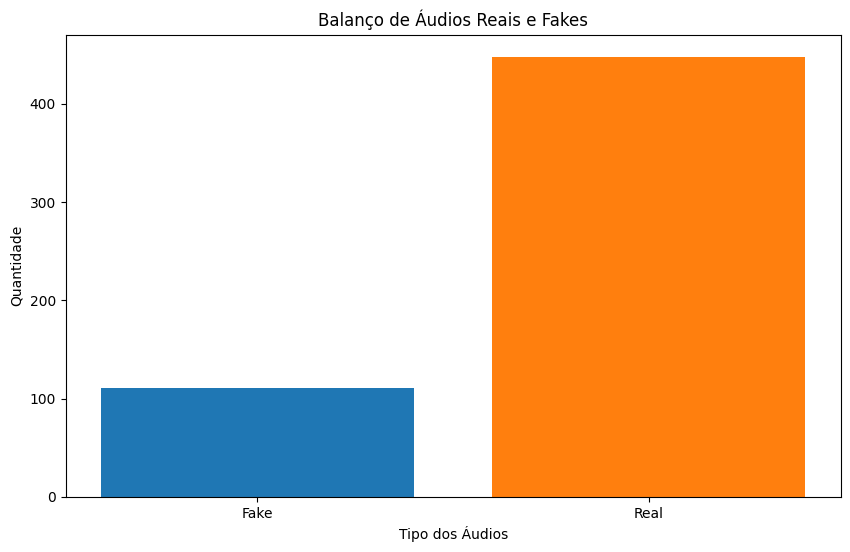

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels.count(0), labels.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7944 - loss: 12.9844
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 2.9669 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - loss: 2.6573 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7112 - loss: 1.8046 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7627 - loss: 1.4302 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.7652 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.6120 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.4712 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.4322 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.4169 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.78
Precisão: 0.83
Recall: 0.88
F1-Score: 0.85


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.86
Recall: 0.99
F1-Score: 0.92


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.90
Precisão: 0.90
Recall: 0.98
F1-Score: 0.93


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.88
Recall: 0.96
F1-Score: 0.92


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 367, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1948
[LightGBM] [Info] Number of data points in the train set: 447, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.821029 -> initscore=1.523335
[LightGBM] [Info] Start training from score 1.523335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.92
Precisão: 0.92
Recall: 0.98
F1-Score: 0.95


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4663 - loss: 7.4811 
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8269 - loss: 3.3956 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 1.2966 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 1.2577 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7977 - loss: 1.0245 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8615 - loss: 0.5642 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8496 - loss: 0.5805 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.4820 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8628 - loss: 0.4711 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - loss: 0.4017 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.87
Precisão: 0.86
Recall: 0.98
F1-Score: 0.91


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.87
Recall: 0.98
F1-Score: 0.92


In [ ]:
# Definição do modelo Conv1D
input_shape = (X_train.shape[1], 1)  # Número de características e 1 canal
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7682 - loss: 2.2887
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7638 - loss: 0.8544 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7849 - loss: 0.6638 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.5233 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4251 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8401 - loss: 0.3734 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.3691 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8779 - loss: 0.3165 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3495 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.3309 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.87
Precisão: 0.86
Recall: 0.98
F1-Score: 0.91


In [ ]:
def reverse_audio(y):
    return y[::-1]

In [ ]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_invertido'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com inversão temporal
data_reverse = []  # Dados com inversão temporal
labels_reverse = []  # Rótulos com inversão temporal

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features)
    labels_reverse.append(0)  # Rótulo "fake"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features_reversed)
    labels_reverse.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'fake' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'fake', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features)
    labels_reverse.append(1)  # Rótulo "real"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features_reversed)
    labels_reverse.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'real' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'real', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

In [ ]:
# Converter para DataFrame
df_reverse = pd.DataFrame(data_reverse)
df_reverse['label'] = labels_reverse

In [ ]:
df_reverse

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-310.286621,79.604019,12.228198,21.525486,7.665128,-4.211032,1.810101,5.094695,-11.634615,-8.634542,-11.995722,-8.216214,-7.915312,0
2,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
3,-293.466736,85.523239,-17.968140,14.533060,-1.766421,-8.089673,-15.009739,-14.136434,-0.515667,-12.503580,-2.912647,-14.359088,0.926545,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,-323.835510,68.766266,4.067491,22.298380,-11.132624,-25.871218,-23.193249,-21.572203,-9.854215,-1.073646,-23.760683,1.365065,-17.567112,1
1114,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1
1115,-313.387054,81.966675,3.320900,13.971745,-18.315617,-25.690226,-17.615883,-17.059967,-12.659113,-4.083637,-22.139357,0.052236,-17.240023,1
1116,-432.503387,52.231987,24.130854,24.908005,5.230207,10.177417,1.667769,11.312072,14.200116,13.155353,9.546826,18.923155,7.199302,1


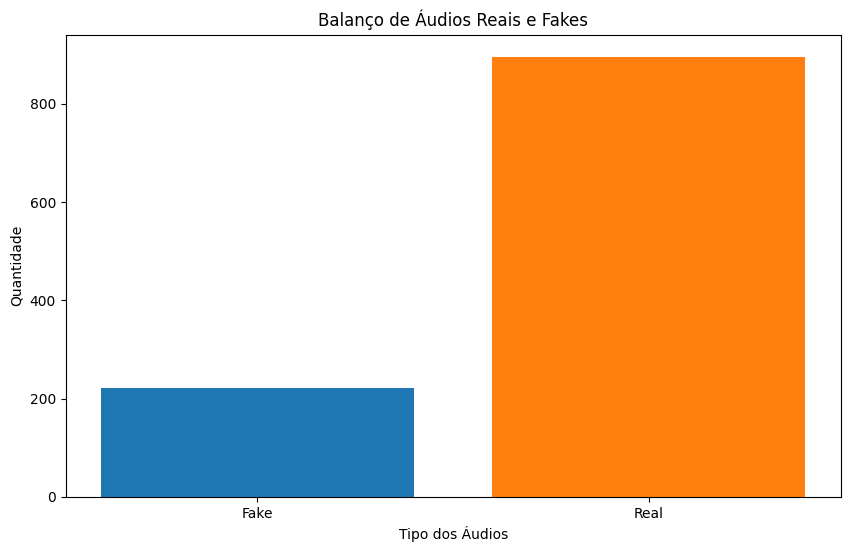

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_reverse.count(0), labels_reverse.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_reverse.drop(columns=['label'])
y = df_reverse['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4441 - loss: 10.6166
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7586 - loss: 2.9196
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 1.6418 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 1.1676
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.8644
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.6535
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8161 - loss: 0.5106
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3883
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8409 - loss: 0.4082
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8452 - loss: 0.3383
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.85
Precisão: 0.85
Recall: 0.98
F1-Score: 0.91


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.97
Precisão: 0.97
Recall: 1.00
F1-Score: 0.98


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.92
Precisão: 0.94
Recall: 0.95
F1-Score: 0.95


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.96
Precisão: 0.97
Recall: 0.98
F1-Score: 0.97


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 720, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 894, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.805369 -> initscore=1.420196
[LightGBM] [Info] Start training from score 1.420196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.99
Precisão: 0.99
Recall: 1.00
F1-Score: 0.99


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3268 - loss: 24.0243
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7733 - loss: 4.8575 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7193 - loss: 2.0139 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 1.1503 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7892 - loss: 0.9829 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8275 - loss: 0.5515 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.4358 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8431 - loss: 0.4085  
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8634 - loss: 0.4243 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8760 - loss: 0.3603 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.87
Precisão: 0.87
Recall: 0.97
F1-Score: 0.92


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.93
Precisão: 0.95
Recall: 0.95
F1-Score: 0.95


In [ ]:
# Definição do modelo Conv1D
input_shape = (X_train.shape[1], 1)  # Número de características e 1 canal
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7706 - loss: 1.1997
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.5080 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8542 - loss: 0.3372 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3118 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8712 - loss: 0.3151 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8955 - loss: 0.2931 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8909 - loss: 0.2999  
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9104 - loss: 0.2362 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9190 - loss: 0.2412 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.2055 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.89
Precisão: 0.96
Recall: 0.90
F1-Score: 0.93


In [ ]:
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_invertido_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com inversão temporal balanceada
data_reverse_balanced = []  # Dados com inversão temporal balanceada
labels_reverse_balanced = []  # Rótulos com inversão temporal balanceada

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features)
    labels_reverse_balanced.append(0)  # Rótulo "fake"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features_reversed)
    labels_reverse_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'fake' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'fake', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features)
    labels_reverse_balanced.append(1)  # Rótulo "real"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features_reversed)
    labels_reverse_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'real' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'real', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

In [ ]:
# Converter para DataFrame
data_reverse_balanced = pd.DataFrame(data_reverse_balanced)
data_reverse_balanced['label'] = labels_reverse_balanced

In [ ]:
data_reverse_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-310.286621,79.604019,12.228198,21.525486,7.665128,-4.211032,1.810101,5.094695,-11.634615,-8.634542,-11.995722,-8.216214,-7.915312,0
2,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
3,-293.466736,85.523239,-17.968140,14.533060,-1.766421,-8.089673,-15.009739,-14.136434,-0.515667,-12.503580,-2.912647,-14.359088,0.926545,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-323.835510,68.766266,4.067491,22.298380,-11.132624,-25.871218,-23.193249,-21.572203,-9.854215,-1.073646,-23.760683,1.365065,-17.567112,1
1788,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1
1789,-313.387054,81.966675,3.320900,13.971745,-18.315617,-25.690226,-17.615883,-17.059967,-12.659113,-4.083637,-22.139357,0.052236,-17.240023,1
1790,-432.503387,52.231987,24.130854,24.908005,5.230207,10.177417,1.667769,11.312072,14.200116,13.155353,9.546826,18.923155,7.199302,1


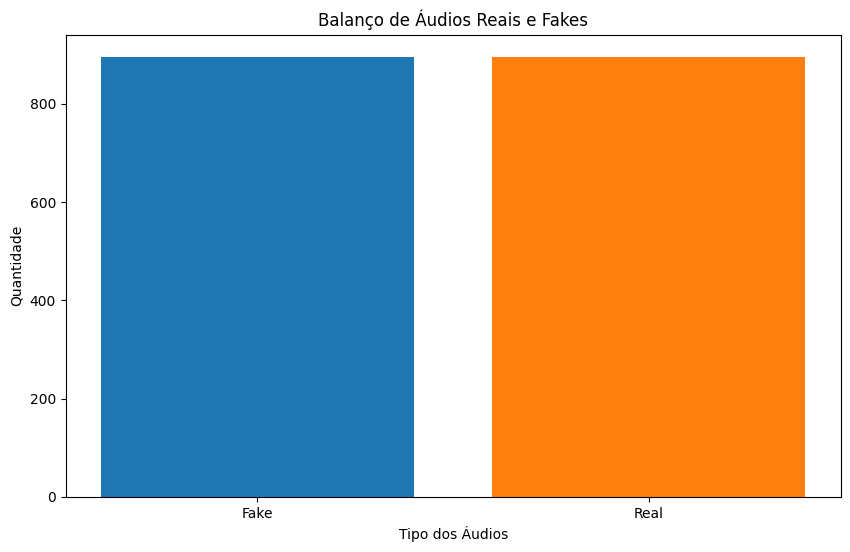

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_reverse_balanced.count(0), labels_reverse_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = data_reverse_balanced.drop(columns=['label'])
y = data_reverse_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5631 - loss: 3.6945
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6961 - loss: 0.7047
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7841 - loss: 0.4862
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8001 - loss: 0.4603
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8631 - loss: 0.3364
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8587 - loss: 0.3487
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8844 - loss: 0.3041
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8699 - loss: 0.3402
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8827 - loss: 0.2877
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9055 - loss: 0.2470
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.89
Precisão: 0.87
Recall: 0.93
F1-Score: 0.90


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.96
Precisão: 1.00
Recall: 0.93
F1-Score: 0.96


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.99
Precisão: 1.00
Recall: 0.99
F1-Score: 0.99


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 716, number of negative: 717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 1433, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499651 -> initscore=-0.001396
[LightGBM] [Info] Start training from score -0.001396


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5390 - loss: 10.2247
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - loss: 1.1324
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7436 - loss: 0.5245
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.4659
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4537
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4321
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.3678
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3488
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3835
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 0.3294
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.86
Precisão: 0.96
Recall: 0.75
F1-Score: 0.84


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.99
Precisão: 1.00
Recall: 0.98
F1-Score: 0.99


In [ ]:
# Definição do modelo Conv1D
input_shape = (X_train.shape[1], 1)  # Número de características e 1 canal
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4442 - loss: 1.2857
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.5925
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4497
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.4055
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3726
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.3495
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8435 - loss: 0.3309
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3320
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.3409
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8593 - loss: 0.3021
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.90
Precisão: 0.96
Recall: 0.84
F1-Score: 0.90
